In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
# https://docs.google.com/spreadsheets/d/1VK-Zs72ebK6ddwvDYFN2cA04PDTbVLXJeylmdJ7OxkM/edit#gid=1517061328

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS2023').get_worksheet(6) #CrowdSourcedSentimentData

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows[1:])

df.columns = rows[0]

df = df.dropna()

import numpy as np
df = df.replace('', np.nan).dropna()

df

[['Slno', 'R', 'G', 'B', 'WhoThinksSo', 'Color'], ['1', '190', '6', '203', 'Darren', 'Purple'], ['2', '181', '28', '192', 'Darren', 'Purple'], ['3', '205', '40', '238', 'Darren', 'Purple'], ['4', '186', '7', '252', 'Yanwei', 'Purple'], ['5', '205', '41', '255', 'Sooraj', 'Purple'], ['6', '181', '55', '219', 'Sooraj', 'Purple'], ['7', '116', '22', '185', 'Sooraj', 'Purple'], ['8', '184', '32', '249', 'Lihini', 'Purple'], ['9', '144', '49', '214', 'Sooraj', 'Purple'], ['10', '110', '61', '142', 'Kamya', 'Purple'], ['11', '145', '66', '198', 'Kamya', 'Purple'], ['12', '192', '160', '213', 'Kamya', 'Purple'], ['13', '148', '60', '175', 'John', 'Purple'], ['14', '180', '160', '213', 'Kamya', 'Purple'], ['15', '166', '130', '228', 'Kamya', 'Purple'], ['16', '221', '216', '235', 'Edward', 'Purple'], ['17', '127', '0', '255', 'Karina', 'Purple'], ['18', '154', '8', '252', 'Yanwei', 'Purple'], ['19', '111', '50', '168', 'Olina', 'Purple'], ['20', '204', '189', '245', 'Kamya', 'Purple'], ['21', 

,Slno,R,G,B,WhoThinksSo,Color
0,1,190,6,203,Darren,Purple
1,2,181,28,192,Darren,Purple
2,3,205,40,238,Darren,Purple
3,4,186,7,252,Yanwei,Purple
4,5,205,41,255,Sooraj,Purple
...,...,...,...,...,...,...
195,196,0,0,255,Parth,NotPurple
196,197,0,182,255,Parth,NotPurple
197,198,255,0,165,Parth,NotPurple
198,199,209,211,119,Parth,NotPurple


# EDA on this dataset:  Visualize the distribution of R , G and B, without considering WhoThinksSo

In [19]:
# Drop the unnecessary column 'Index'
df = df[['R', 'G', 'B', 'WhoThinksSo', 'Color']]
df.head()

,R,G,B,WhoThinksSo,Color
0,190,6,203,Darren,Purple
1,181,28,192,Darren,Purple
2,205,40,238,Darren,Purple
3,186,7,252,Yanwei,Purple
4,205,41,255,Sooraj,Purple


In [20]:
df['R'] = df['R'].astype('float')
df['G'] = df['G'].astype('float')
df['B'] = df['B'].astype('float')
df['WhoThinksSo'] = df['WhoThinksSo'].astype('category')
df['Color'] = df['Color'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   R            200 non-null    float64 
 1   G            200 non-null    float64 
 2   B            200 non-null    float64 
 3   WhoThinksSo  200 non-null    category
 4   Color        200 non-null    category
dtypes: category(2), float64(3)
memory usage: 7.5 KB


<ipython-input-20-215d61881252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R'] = df['R'].astype('float')
<ipython-input-20-215d61881252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['G'] = df['G'].astype('float')
<ipython-input-20-215d61881252>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

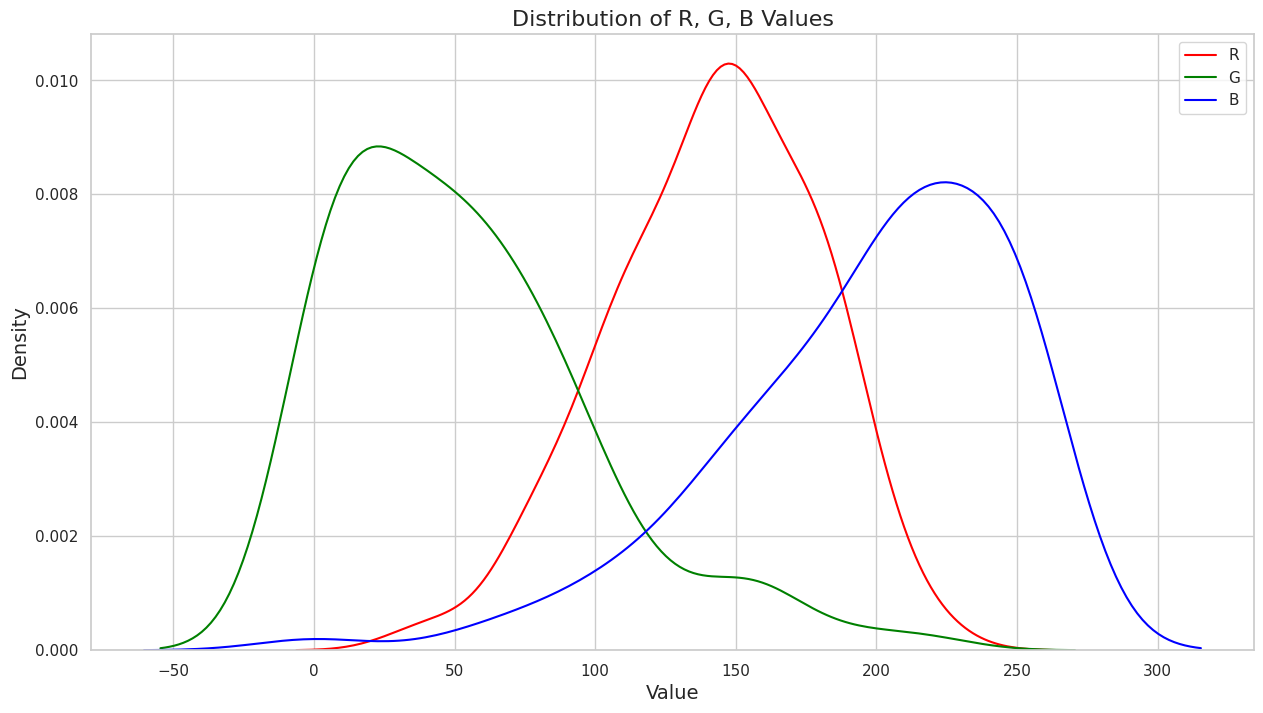

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(15, 8))

# Create the overall distribution plot for R, G, and B values
sns.kdeplot(data=df[df['Color']=="Purple"], x='R', color='red', label='R')
sns.kdeplot(data=df[df['Color']=="Purple"], x='G', color='green', label='G')
sns.kdeplot(data=df[df['Color']=="Purple"], x='B', color='blue', label='B')

# Set the title and labels
plt.title('Distribution of R, G, B Values', size=16)
plt.xlabel('Value', size=14)
plt.ylabel('Density', size=14)

# Show the legend
plt.legend()

# Show the plot
plt.show()


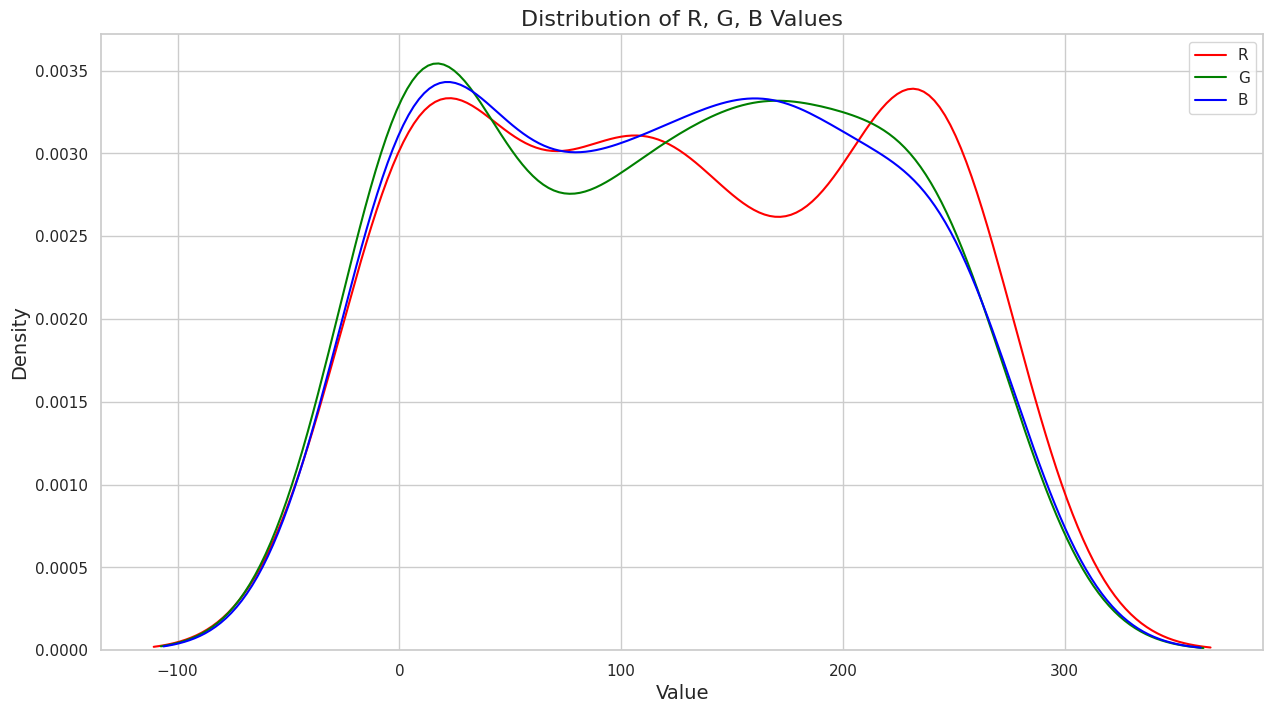

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(15, 8))

# Create the overall distribution plot for R, G, and B values
sns.kdeplot(data=df[df['Color']=="NotPurple"], x='R', color='red', label='R')
sns.kdeplot(data=df[df['Color']=="NotPurple"], x='G', color='green', label='G')
sns.kdeplot(data=df[df['Color']=="NotPurple"], x='B', color='blue', label='B')

# Set the title and labels
plt.title('Distribution of R, G, B Values', size=16)
plt.xlabel('Value', size=14)
plt.ylabel('Density', size=14)

# Show the legend
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='Color', ylabel='B'>

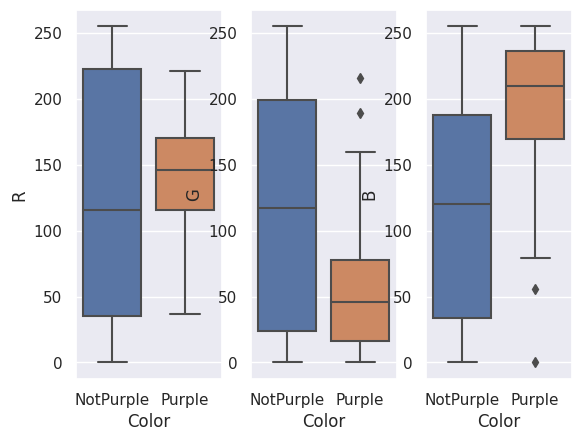

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, axes = plt.subplots(1,3)
sns.boxplot(x='Color', y = 'R', data=df, ax=axes[0])
sns.boxplot(x='Color', y = 'G', data=df, ax=axes[1])
sns.boxplot(x='Color', y = 'B', data=df, ax=axes[2])

# Lets build a set of models to classify Purple

# H2O

In [28]:
! pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153909 sha256=c86b38941db4c46985720a4c36d13ffe3b2b2771ad25da35aaf18d4ff52c2507
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


In [43]:
from google.colab import output
output.serve_kernel_port_as_window(54321)

<IPython.core.display.Javascript object>

In [37]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.138s


In [41]:
import h2o
# h2o.shutdown()
h2o.init(bind_to_localhost=False, ip="localhost")
h2odf = h2o.H2OFrame(df, destination_frame="purpleClassifierData.hex")

Checking whether there is an H2O instance running at http://localhost:54321.

<ipython-input-41-2af43900cf52>:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


.... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4ooc4lug
  JVM stdout: /tmp/tmp4ooc4lug/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4ooc4lug/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,8 hours and 24 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_x60toq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
!lt --port 54321

In [44]:
df.to_csv("/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week03/h2oTrainingDF.csv", index=None)

# LazyClassifier

In [26]:
! pip install lazypredict

In [27]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['Color', 'WhoThinksSo'], axis=1)
y = df['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

clf = LazyClassifier(verbose = 0 , ignore_warnings = True, custom_metric= None)
models, preditions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:05<00:00,  5.47it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.90,0.90,None,0.90,0.64
SVC,0.90,0.89,None,0.90,0.13
GaussianNB,0.88,0.88,None,0.88,0.03
QuadraticDiscriminantAnalysis,0.88,0.88,None,0.88,0.08
NuSVC,0.88,0.87,None,0.88,0.04
LabelSpreading,0.88,0.87,None,0.88,0.05
LabelPropagation,0.88,0.87,None,0.88,0.02
KNeighborsClassifier,0.88,0.86,None,0.88,0.04
LGBMClassifier,0.85,0.85,None,0.85,0.77
